 # Features

For our Article example in the first section, we knew a typical data project has these steps:
- Define the goal, task
- **Data preprocessing**
- Explanatory data analysis
- **Feature engineering**
- Modeling
- Performance evaluation

We had gone through performance evaluation, prediction methods, better modeling and evaluation techniques. In this section, we move back to previous steps in the predictive analysis pipeline. 

PS Last time we mention it's ideal to do cross validation. But we would stick to train-test for the following explanation

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

# How the features matter?

Recall predictive analysis:
$x_1,x_2,x_3... \to y$

where  
$x_1, x_2, x_3...$ features could be numerical or categorical  
$y$ could be categorical or numberical

**What kinds of features these methods could take?**

- KNN 
- Linear regression
- Decision tree

Today we would discuss about these questions.
### Question: What if our data contains missing value?  
### Question: What if our data contains other data types? What if there is a featue recording date? text?  

# Missing Value Handling
Oftenly, data contains a bunch of blanks in some records this is called missing value.

### Let's take a look on titanic dataset last time

In [2]:
titanic = pd.read_csv("../datasets/titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Among 891 passengers, some of them lack `Age` and there are lots of missing in `Cabin`.
### Take another look on Article data set from iLong

In [4]:
article = pd.read_csv("../datasets/Article.csv")
article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ArticleID       3482 non-null   int64  
 1   ExpertID        3482 non-null   int64  
 2   CategoryID      3482 non-null   int64  
 3   Subject         3482 non-null   object 
 4   Thumbnail       3480 non-null   object 
 5   PostTime        3482 non-null   object 
 6   ClickCount      3482 non-null   int64  
 7   ReadBook        25 non-null     float64
 8   CreateUserID    2279 non-null   float64
 9   CreateUserName  2279 non-null   object 
 10  CreateTime      2279 non-null   object 
 11  ModifyUserID    3482 non-null   int64  
 12  ModifyUserName  3482 non-null   object 
 13  ModifyTime      3482 non-null   object 
 14  SubCategoryID   0 non-null      float64
 15  PlatformType    3482 non-null   int64  
 16  DeleteStatus    3482 non-null   int64  
dtypes: float64(3), int64(7), object(7

### Question: Why missing value handling important?
- For prediction: Our prediction model is $x_1, x_2...\to y$ If a record contains missing values, how could our model predict that?
- For training: Could our method handle missing value properly?

### Question: In pratice, missing value happens. Why?

## 3 types of reasons why missing happen
- Missing Completely at Random (MCAR): The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.
- Missing at Random (MAR): Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data
- Missing not at Random (MNAR): Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable)
source: https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

## Missing value handling

The following are some common methods for missing value handling
- Drop record: careful for distortion
- Imputation
    - Impute by single value
        - Numerical: 0, mean, median...
        - Categorical: "na",mode...
    - Other imputation methods
        - asign distribution
        - model impute
        - transform into isna column and imputed
- Neglect: some method interplay with nans e.g.xgboost nan split

### Question: How to decide which method to use?
Here's my view
- Missing reason: how the data for the feature was collected
- Data condition: value distribution, how much data we have
- Prediction method: Is the method consistent with the algorithm you are going to use? 

**Should have some recipes for the last 2, or else you would forget when implementing**

### Question: If we'd like to impute a feature by its mean, which mean is it? How to impute testing data?
*Data leakage: Data leakage is when information from outside the training dataset is used to create the model*


In [5]:
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis = 'columns'),titanic['Survived'])

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 35 to 37
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Name         668 non-null    object 
 3   Sex          668 non-null    object 
 4   Age          535 non-null    float64
 5   SibSp        668 non-null    int64  
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Cabin        149 non-null    object 
 10  Embarked     667 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 62.6+ KB


In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 862 to 449
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  223 non-null    int64  
 1   Pclass       223 non-null    int64  
 2   Name         223 non-null    object 
 3   Sex          223 non-null    object 
 4   Age          179 non-null    float64
 5   SibSp        223 non-null    int64  
 6   Parch        223 non-null    int64  
 7   Ticket       223 non-null    object 
 8   Fare         223 non-null    float64
 9   Cabin        55 non-null     object 
 10  Embarked     222 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 20.9+ KB


In [8]:
whole_data_age_mean = titanic['Age'].mean()
print("age mean in whole data: %s"%whole_data_age_mean)
train_age_mean = X_train['Age'].mean()
print("age mean in training data: %s"%train_age_mean)

age mean in whole data: 29.69911764705882
age mean in training data: 30.073682242990653


In [9]:
# drop col Cabin
X_train.drop('Cabin',axis = 'columns',inplace = True)
X_test.drop('Cabin',axis = 'columns',inplace = True)

# impute Age by train age mean
X_train['Age'].fillna(train_age_mean,inplace = True)
X_test['Age'].fillna(train_age_mean,inplace = True)

In [10]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
35,36,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,S
46,47,3,"Lennon, Mr. Denis",male,30.073682,1,0,370371,15.5000,Q
453,454,1,"Goldenberg, Mr. Samuel L",male,49.000000,1,0,17453,89.1042,C
291,292,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C
748,749,1,"Marvin, Mr. Daniel Warner",male,19.000000,1,0,113773,53.1000,S


In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 35 to 37
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Name         668 non-null    object 
 3   Sex          668 non-null    object 
 4   Age          668 non-null    float64
 5   SibSp        668 non-null    int64  
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Embarked     667 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 57.4+ KB


In [12]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
862,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,S
223,224,3,"Nenkoff, Mr. Christo",male,30.073682,0,0,349234,7.8958,S
84,85,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,S
680,681,3,"Peters, Miss. Katie",female,30.073682,0,0,330935,8.1375,Q
535,536,2,"Hart, Miss. Eva Miriam",female,7.000000,0,2,F.C.C. 13529,26.2500,S


In [13]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, 862 to 449
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  223 non-null    int64  
 1   Pclass       223 non-null    int64  
 2   Name         223 non-null    object 
 3   Sex          223 non-null    object 
 4   Age          223 non-null    float64
 5   SibSp        223 non-null    int64  
 6   Parch        223 non-null    int64  
 7   Ticket       223 non-null    object 
 8   Fare         223 non-null    float64
 9   Embarked     222 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 19.2+ KB


# Appendix: Predictive analysis pipeline

The analysis pipeline we state at the begining does not specify the which data set.
- Define the goal, task
- **Data preprocessing**
- Explanatory data analysis
- **Feature engineering**
- Modeling
- Performance evaluation

In predictive analysis, the above pipeline could be written as

- Doing experiments to find a good model
    - Data spliting
    - train data $\to$ data preprocessing $\to$ EDA $\to$ feature engineering $\to$ modeling
        - Store the info for data processing, model
    - test data $\to$ data preprocessing $\to$ feature engineering $\to$ performance evaluation
        - **process test data using same setting, same info as for training data**

- When you deploy the model
    - whole original data $\to$ data preprocessing $\to$ feature engineering $\to$ modeling

### Question: can you draw the pipeline in the cross validation - holdout senario ?
<div><img src="./grid_search_cross_validation.png" width="300"/></div>

**Notes for Python sklearn users:** There is a "Pipeline" module that you could make use of.
<div><img src="./sklearn_pipeline.jpg" width="500"/></div>

# Feature engineering

Feature engineering is one of the most time consuming step in traditional machine learning. It's more like an art rely heavily on the combination of experience and engineering. It has some purposes:

- Machine learning methods limitation  
Some machine learning methods need you to adjust data into suitable form to make them work.Take our titanic data as an example, can we use KNN on this data set? linear regression? decision tree?

In [14]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
35,36,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,S
46,47,3,"Lennon, Mr. Denis",male,30.073682,1,0,370371,15.5000,Q
453,454,1,"Goldenberg, Mr. Samuel L",male,49.000000,1,0,17453,89.1042,C
291,292,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.000000,1,0,11967,91.0792,C
748,749,1,"Marvin, Mr. Daniel Warner",male,19.000000,1,0,113773,53.1000,S


- Model performance improvement
> Feature engineering is the process of transforming data into features that better represent the underlying problem, resulting in improved machine learning performance. -- "Feature Engineering Made Easy" pp31

### An example

Too vague? Let's see the following example. Suppose we want to predict whther a person is healthy given one's height(cm) and weight(kg).

In [15]:
data_size = 100
np.random.seed(1)
data = pd.concat([pd.Series(np.random.normal(170,10,data_size),name = 'height'),
                  pd.Series(np.random.normal(60,10,data_size),name = 'weight')
                 ],axis = 'columns')
data['kerker'] = data.apply(lambda x:x['weight']/((x['height']/100)**2),axis = 'columns')
data['healthy'] = ((data['kerker'] < 24) & (data['kerker']>18.5)).apply(lambda x:1 if x==True else 0)
data.drop('kerker',axis = 'columns',inplace = True)
data.head()

,height,weight,healthy
0,186.243454,55.528714,0
1,163.882436,72.245077,0
2,164.718282,64.034916,1
3,159.270314,65.935785,0
4,178.654076,49.050882,0


In [16]:
# data splitting
test_size = data_size//2
train = data.iloc[:-test_size]
test = data.iloc[test_size:]
X_train = train.drop('healthy',axis = 'columns')
y_train = train['healthy']
X_test = test.drop('healthy',axis = 'columns')
y_test = test['healthy']

### Some EDA

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  50 non-null     float64
 1   weight  50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [18]:
X_train.describe()

,height,weight
count,50.000000,50.000000
mean,169.744852,60.846589
std,9.794331,8.804369
min,146.984613,41.420181
25%,163.094613,54.352774
50%,168.178681,62.009385
75%,176.086061,67.260552
max,191.002551,79.671017


array([[<Axes: xlabel='height', ylabel='height'>,
        <Axes: xlabel='weight', ylabel='height'>,
        <Axes: xlabel='healthy', ylabel='height'>],
       [<Axes: xlabel='height', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='healthy', ylabel='weight'>],
       [<Axes: xlabel='height', ylabel='healthy'>,
        <Axes: xlabel='weight', ylabel='healthy'>,
        <Axes: xlabel='healthy', ylabel='healthy'>]], dtype=object)

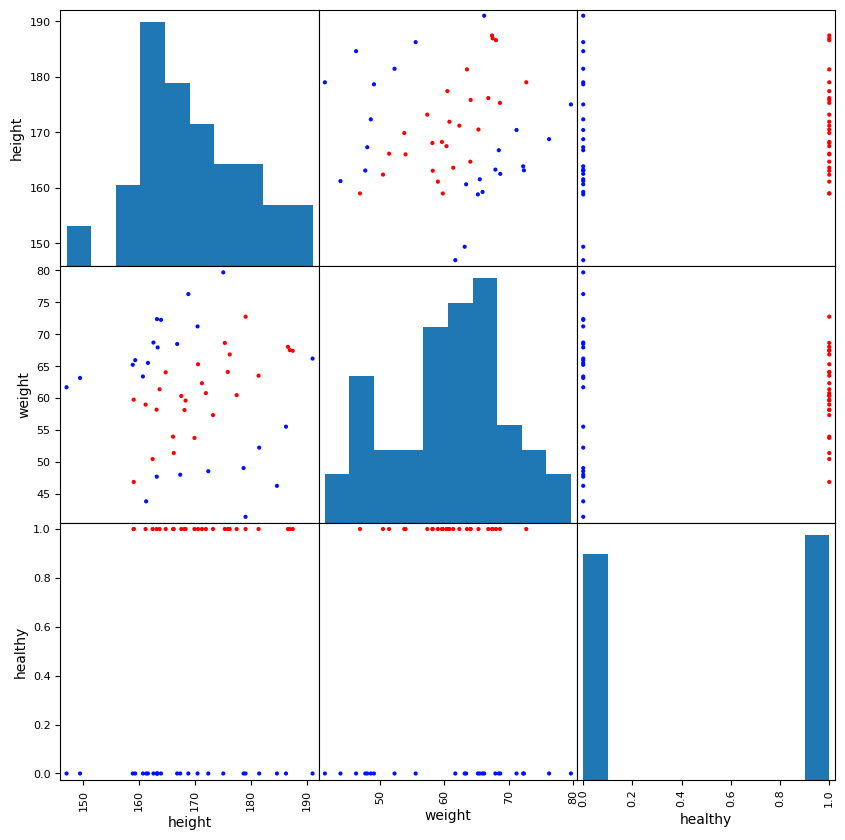

In [19]:
colors = train["healthy"].apply(lambda x: "#0011ff" if x == 0 else "#ff0000")
pd.plotting.scatter_matrix(train,color = colors,alpha = 1,figsize = (10,10))

There are only two features in this data set. Can you, human, have some model in your mind?  
If not, let's make machine learning to help us!

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [21]:
res = pd.DataFrame(columns = ['accuracy'])
res.index.rename('model',inplace = True)
clf_list = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),MLPClassifier()]
for clf in clf_list:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    res.loc[type(clf).__name__,'accuracy'] = sum(y_test == y_pred)/len(y_test)
res

/Users/ethancy/Data_Science_Course_UCLA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy
model,
LogisticRegression,0.62
KNeighborsClassifier,0.8
DecisionTreeClassifier,0.68
RandomForestClassifier,0.8
XGBClassifier,0.8
MLPClassifier,0.64


In [22]:
# Logistic regression
print(clf_list[0].intercept_)
print(clf_list[0].coef_)

[-5.51327543]
[[ 0.03352156 -0.00154749]]


The fitted logistic regression model is  
probability of healthy $= y = \frac{1}{1+e^{-0.18651309+0.00613549 *height -0.01248312*weight}}$

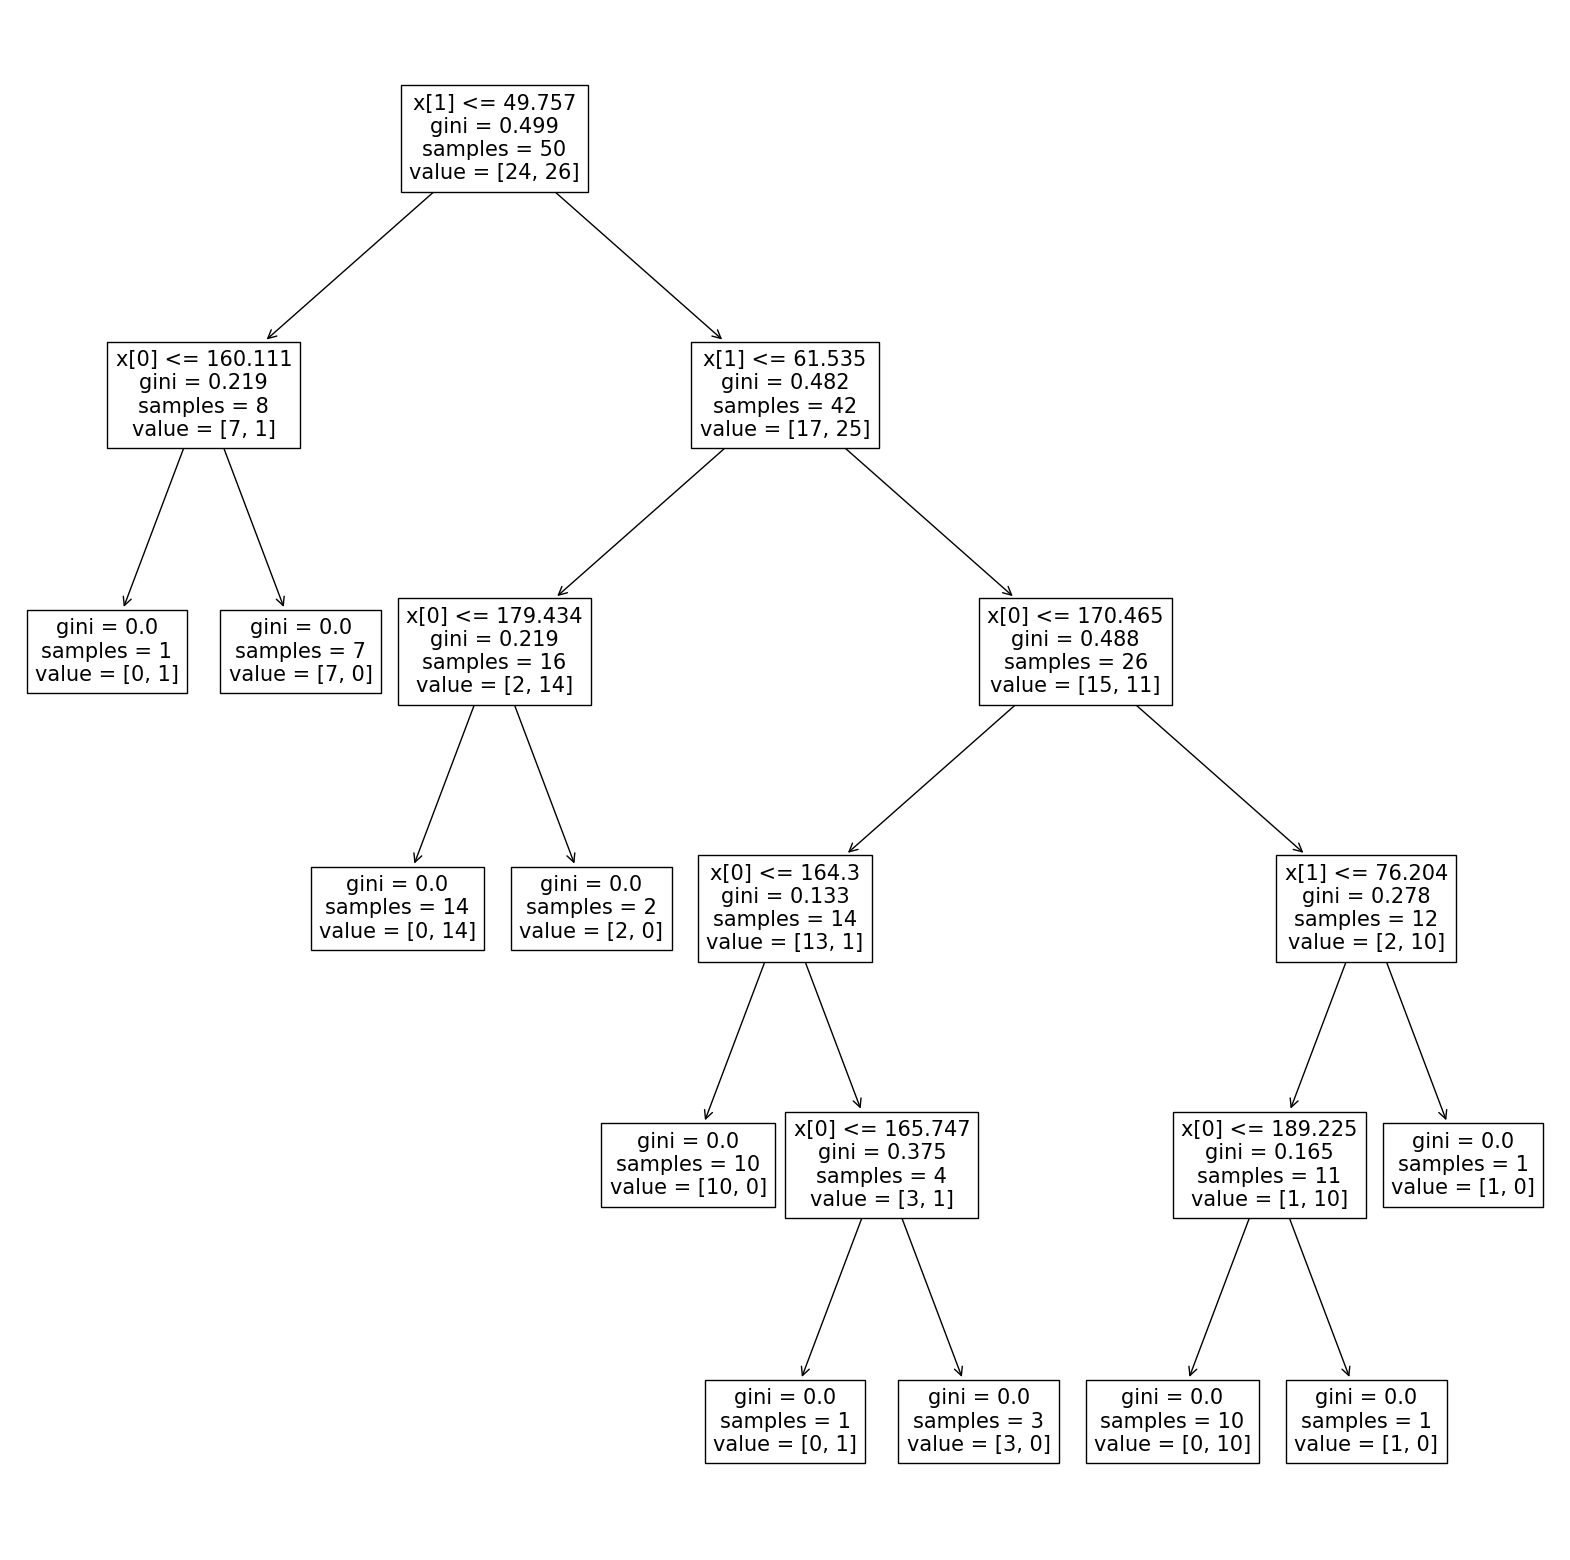

In [23]:
# tree left = yes, right = no
plt.figure(figsize=(20,20))
plot_tree(clf_list[2])
plt.show()

### Let's develop a feature called BMI  
# $BMI = \frac{weight}{(\frac{height}{100})^2}$

Can you guess how would the performance become?

In [24]:
for df in [X_train,X_test]:
    df['BMI'] = df.apply(lambda x:x['weight']/((x['height']/100)**2),axis = 'columns')

In [25]:
X_train.head()

,height,weight,BMI
0,186.243454,55.528714,16.008682
1,163.882436,72.245077,26.899452
2,164.718282,64.034916,23.601154
3,159.270314,65.935785,25.992707
4,178.654076,49.050882,15.368128


In [26]:
res = pd.DataFrame(columns = ['accuracy'])
clf_list = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),MLPClassifier()]
for clf in clf_list:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    res.loc[type(clf).__name__,'accuracy'] = sum(y_test == y_pred)/len(y_test)
res

,accuracy
LogisticRegression,0.7
KNeighborsClassifier,0.8
DecisionTreeClassifier,0.94
RandomForestClassifier,0.9
XGBClassifier,0.98
MLPClassifier,0.56


Whoa! big improvement for tree-based methods(DecisionTreeClassifier, RandomForestClassifier, XGBClassifier) and some improvement for Neuro network(MLPClassifier). How ever the performance for Logisitc regression is even worse.

In [27]:
# Logistic regression
print(clf_list[0].intercept_)
print(clf_list[0].coef_)

[67.59975434]
[[-0.39366287  0.59999132 -1.74755609]]


The fitted logistic regression model is  
probability of healthy $= y = \frac{1}{1+e^{-0.09470083+-0.00133222 *height + 0.07457899*weight + -0.20324103*BMI}}$

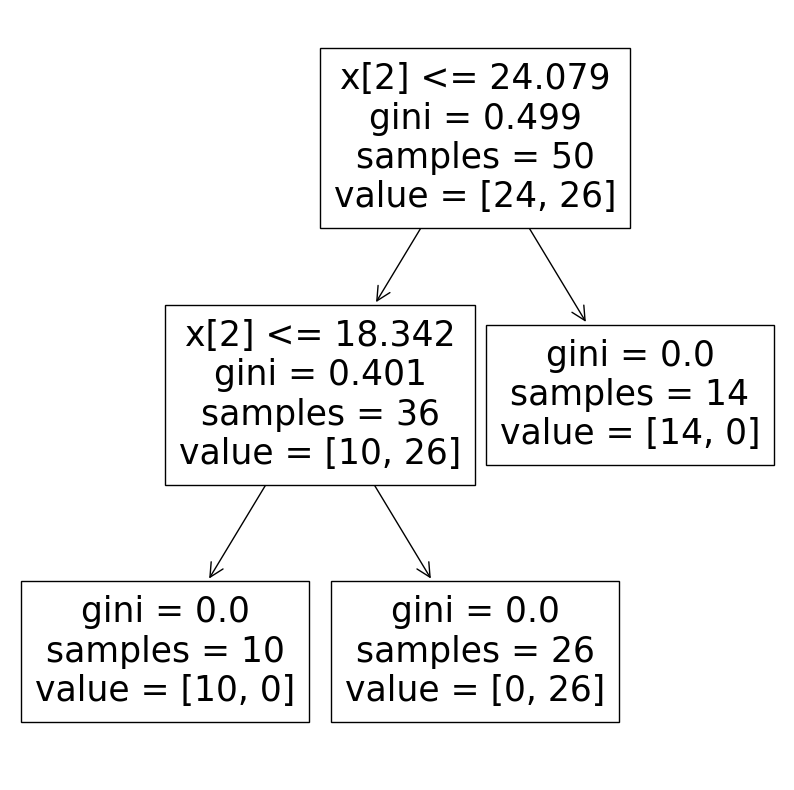

In [28]:
# tree
plt.figure(figsize=(10,10))
plot_tree(clf_list[2])
plt.show()

#### We find 2 things:
- BMI is a good feature, for tree based methods. But for logistic regression, is it?
- Logistic regression tend to use all the features in one shot. Tree would greedily use only the most effective feature for each split.

For the finding #2, a quick litte demo:

In [29]:
haha_X_train = X_train.copy()
haha_X_test = X_test.copy()
for df in [haha_X_train,haha_X_test]:
    for i in range(2,10):
        df['height_'+str(i)] = df['height']**i
haha_X_train.head()

,height,weight,BMI,height_2,height_3,height_4,height_5,height_6,height_7,height_8,height_9
0,186.243454,55.528714,16.008682,34686.624023,6.460157e+06,1.203162e+09,2.240810e+11,4.173362e+13,7.772614e+15,1.447599e+18,2.696057e+20
1,163.882436,72.245077,26.899452,26857.452785,4.401465e+06,7.213228e+08,1.182121e+11,1.937289e+13,3.174877e+15,5.203065e+17,8.526910e+19
2,164.718282,64.034916,23.601154,27132.112582,4.469155e+06,7.361515e+08,1.212576e+11,1.997335e+13,3.289975e+15,5.419191e+17,8.926398e+19
3,159.270314,65.935785,25.992707,25367.032851,4.040215e+06,6.434864e+08,1.024883e+11,1.632334e+13,2.599823e+15,4.140747e+17,6.594981e+19
4,178.654076,49.050882,15.368128,31917.278976,5.702152e+06,1.018713e+09,1.819972e+11,3.251454e+13,5.808855e+15,1.037776e+18,1.854028e+20


In [30]:

res = pd.DataFrame(columns = ['accuracy'])
clf_list = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),MLPClassifier()]
for clf in clf_list:
    clf.fit(haha_X_train,y_train)
    y_pred = clf.predict(haha_X_test)
    res.loc[type(clf).__name__,'accuracy'] = sum(y_test == y_pred)/len(y_test)
res

,accuracy
LogisticRegression,0.5
KNeighborsClassifier,0.58
DecisionTreeClassifier,0.94
RandomForestClassifier,0.9
XGBClassifier,0.98
MLPClassifier,0.5


OK! let's move back to our example. We knew more (useless) features would probably harm model-based methods. (multicollinearity issue)

Now let's try dropping original features, just keep BMI.

In [31]:
for df in [X_train,X_test]:
    df.drop(['height','weight'],axis = 'columns',inplace = True)
X_train.head()

,BMI
0,16.008682
1,26.899452
2,23.601154
3,25.992707
4,15.368128


In [32]:
res = pd.DataFrame(columns = ['accuracy'])
clf_list = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),MLPClassifier()]
for clf in clf_list:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    res.loc[type(clf).__name__,'accuracy'] = sum(y_test == y_pred)/len(y_test)
res

,accuracy
LogisticRegression,0.62
KNeighborsClassifier,0.82
DecisionTreeClassifier,0.94
RandomForestClassifier,0.94
XGBClassifier,0.98
MLPClassifier,0.5


better for logistic regression!   
Now we set an evil magic feature "BMI_from_21.25"

In [33]:
for df in [X_train,X_test]:
    df['BMI_from_21.25'] = np.abs(df['BMI'] - 21.25)
X_train.head()

,BMI,BMI_from_21.25
0,16.008682,5.241318
1,26.899452,5.649452
2,23.601154,2.351154
3,25.992707,4.742707
4,15.368128,5.881872


In [34]:
res = pd.DataFrame(columns = ['accuracy'])
clf_list = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),MLPClassifier()]
for clf in clf_list:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    res.loc[type(clf).__name__,'accuracy'] = sum(y_test == y_pred)/len(y_test)
res

/Users/ethancy/Data_Science_Course_UCLA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy
LogisticRegression,0.92
KNeighborsClassifier,0.82
DecisionTreeClassifier,0.94
RandomForestClassifier,0.94
XGBClassifier,0.92
MLPClassifier,0.96


Logistic regression performs better than trees and being nearly perfect! We found the magic feature!  
But just see more feature may harm logistic regression, let's exclude the BMI feature.

In [35]:
for df in [X_train,X_test]:
    df.drop('BMI',axis = 'columns',inplace = True)
X_train.head()

,BMI_from_21.25
0,5.241318
1,5.649452
2,2.351154
3,4.742707
4,5.881872


In [36]:
res = pd.DataFrame(columns = ['accuracy'])
clf_list = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier(),MLPClassifier()]
for clf in clf_list:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    res.loc[type(clf).__name__,'accuracy'] = sum(y_test == y_pred)/len(y_test)
res

/Users/ethancy/Data_Science_Course_UCLA/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy
LogisticRegression,0.92
KNeighborsClassifier,0.92
DecisionTreeClassifier,0.94
RandomForestClassifier,0.94
XGBClassifier,0.92
MLPClassifier,0.96


#### Awesome!

### Question: Do you have any idea about how to automate or have a SOP for feature engineering?
The feature engineering is complex and require lots of experience.

## Some feature engineering techniques

There are too many materials. I simply Googled "feature engineering" and give you [this](https://github.com/abhat222/Data-Science--Cheat-Sheet/blob/master/Data%20Science/Feature%20Engineering.pdf)

- categorical
    - label encoding
    - one hot encoding
    - count encoding
    - binary encoding
    - trigonometric encoding
    - target encoding
- numberical
    - normalization
    - binning
- other
    - multiple columns: e.g. feature interaction e.g. groupby other categorical colunmns -> anomaly detection
    - text: e.g. count encoding
    - sequence engineering e.g. lag features
    - intergrate into predictive method
- target transform
    - log
    - normalization
    - regression <-> classification

### Question: How to determine feature importance?  What do we mean by "important feature"? How do we know if we develop a good/useless feature?

### My view for developing features
- Domain know-how
- Data condition
- Prediction methods

Some tips:
- Unify the scales of the features when using model-based methods
- Watch out for multi-colliearity when using model-based methods
- Check domain simliarity in feature as well as target when using tree-based methods

-----
# Little tutorial: how to use pipeline in sklearn?
You could see the transformer and prediction model looks alike in sklearn.

### example:
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)

```

Prediction model could be viewed as a sophisticated target encoding. Hehehe...

# Feature devlopements: back to basics
We have some ideas for how we could solve predictive analysis done from tabular data: 
$x_1,x_2,x_3... \to y$

where  
$x_1, x_2, x_3...$ features could be numerical or categorical  
$y$ could be categorical or numberical
Then we could do some further imputation and feature engineering on $x_1, x_2...$

Now back to basics, when we're trying to make a predictive goal. 

- What would be a record in our data set?
- What would be $y$?
- What would be $x_1, x_2...$?

